Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


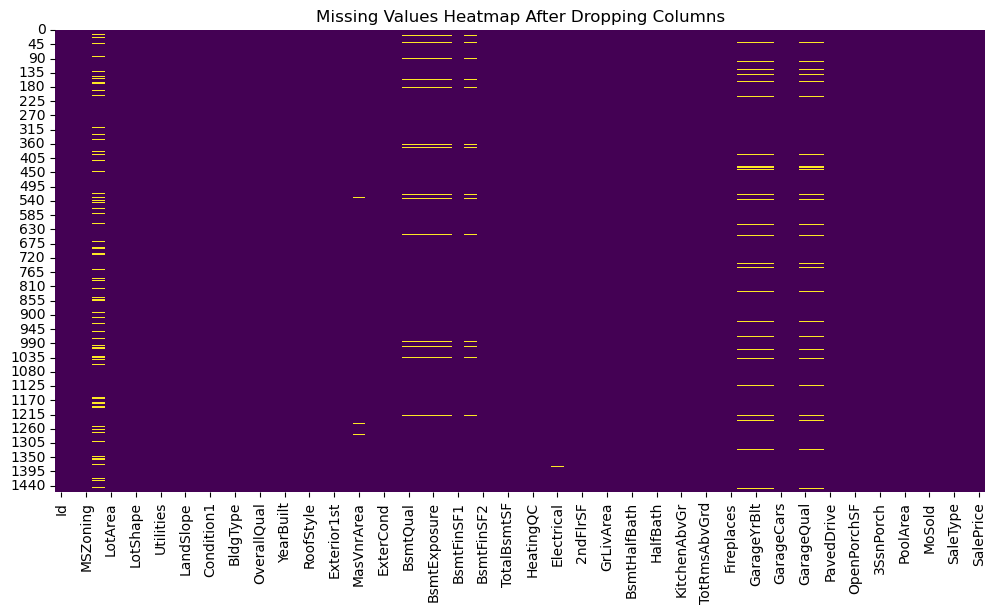

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         0         65.0     8450       0         0   
1        2          20         0         80.0     9600       0         0   
2        3          60         0         68.0    11250       0         1   
3        4          70         0         60.0     9550       0         1   
4        5          60         0         84.0    14260       0         1   
...    ...         ...       ...          ...      ...     ...       ...   
1455  1456          60         0         62.0     7917       0         0   
1456  1457          20         0         85.0    13175       0         0   
1457  1458          70         0         66.0     9042       0         0   
1458  1459          20         0         68.0     9717       0         0   
1459  1460          20         0         75.0     9937       0         0   

      LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            

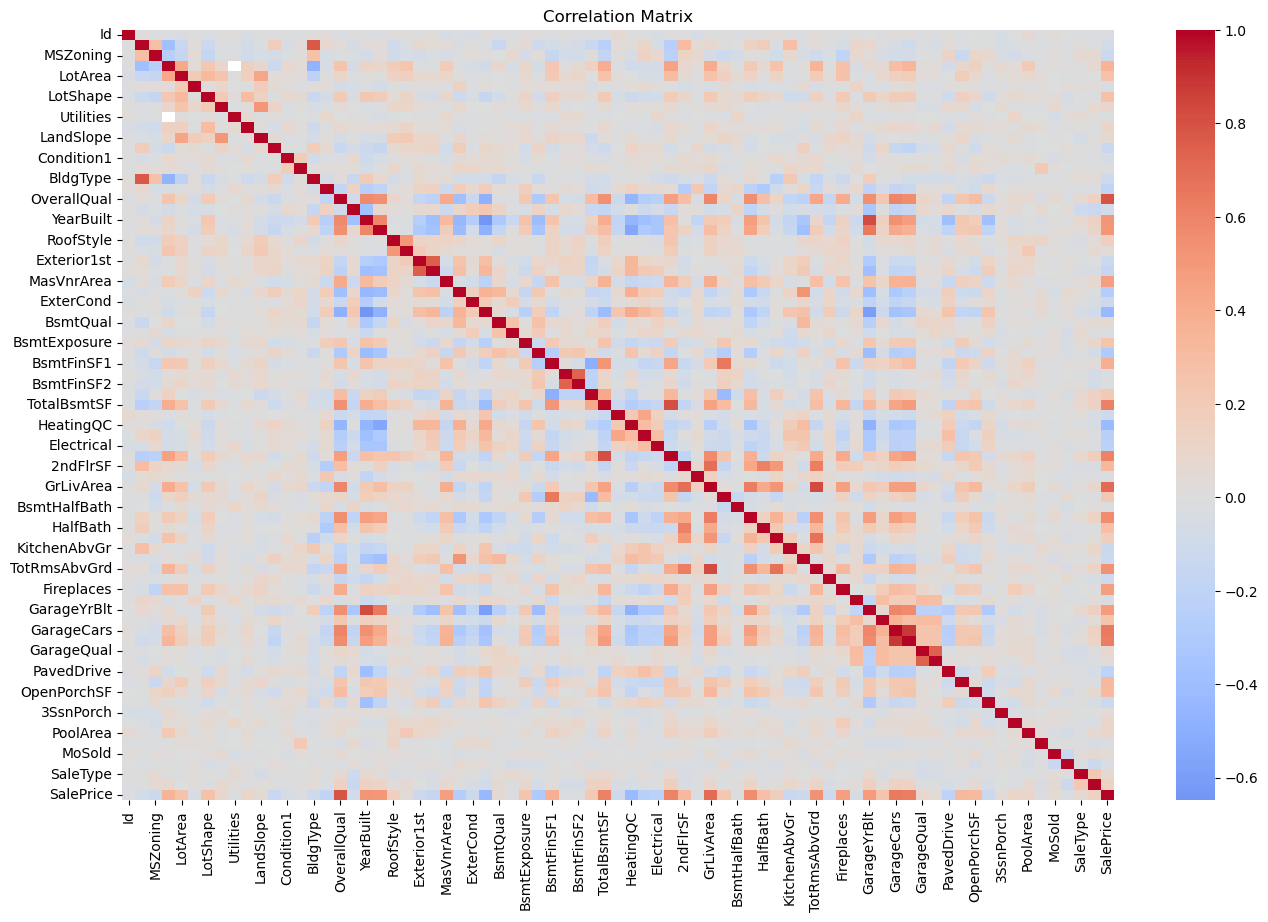


Top features correlated with SalePrice:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotShape         0.267759
LotArea          0.263843
GarageFinish     0.247470
BsmtExposure     0.244946
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
RoofStyle        0.159332
SaleCondition    0.142503
ScreenPorch      0.111447
Name: SalePrice, dtype: float64
Training set: (1022, 74), Validation set: (219, 74), Test set: (219, 74)

Validation MSE (Logarithmic): 0.02263966302969141
Validation RMSE (Logar

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Drop features with more than 500 null values
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Dropping Columns')
plt.show()

# Step 3: Integer mapping for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Integer mapping (using factorize for mapping)
for col in categorical_cols:
    train[col], _ = train[col].factorize()

print(train)

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Visualizing the correlation matrix (optional)
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# If you want to see the top correlations with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nTop features correlated with SalePrice:\n", top_corr_features.head(30))

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Train a Random Forest model on the Train set
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = rf_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


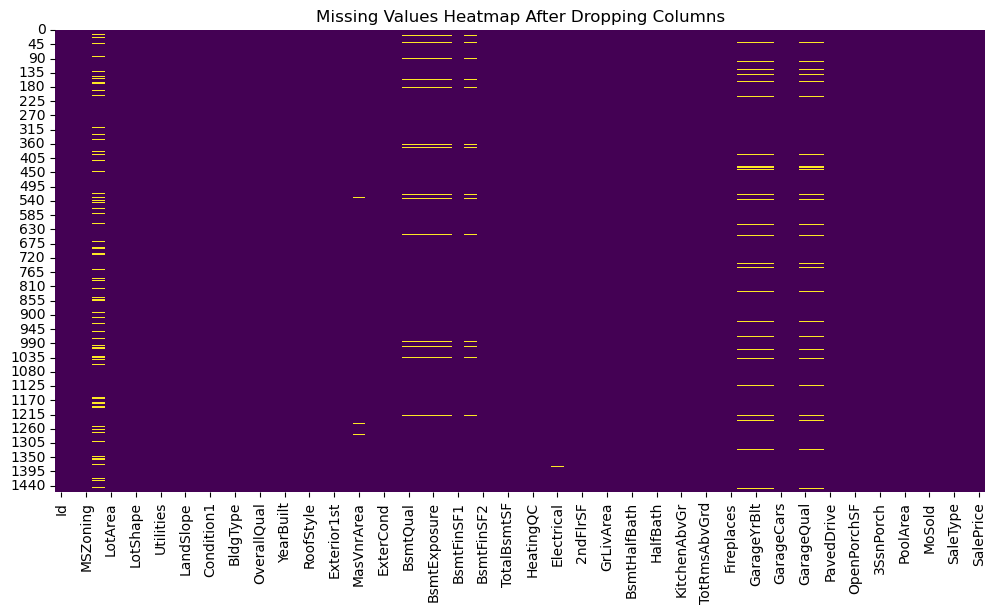

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         0         65.0     8450       0         0   
1        2          20         0         80.0     9600       0         0   
2        3          60         0         68.0    11250       0         1   
3        4          70         0         60.0     9550       0         1   
4        5          60         0         84.0    14260       0         1   
...    ...         ...       ...          ...      ...     ...       ...   
1455  1456          60         0         62.0     7917       0         0   
1456  1457          20         0         85.0    13175       0         0   
1457  1458          70         0         66.0     9042       0         0   
1458  1459          20         0         68.0     9717       0         0   
1459  1460          20         0         75.0     9937       0         0   

      LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Drop features with more than 500 null values
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Dropping Columns')
plt.show()

# Step 3: Integer mapping for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Integer mapping (using factorize for mapping)
for col in categorical_cols:
    train[col], _ = train[col].factorize()

print(train)

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Train a Random Forest model on the Train set
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = rf_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")

WITH ONE-HOT ENCODING

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


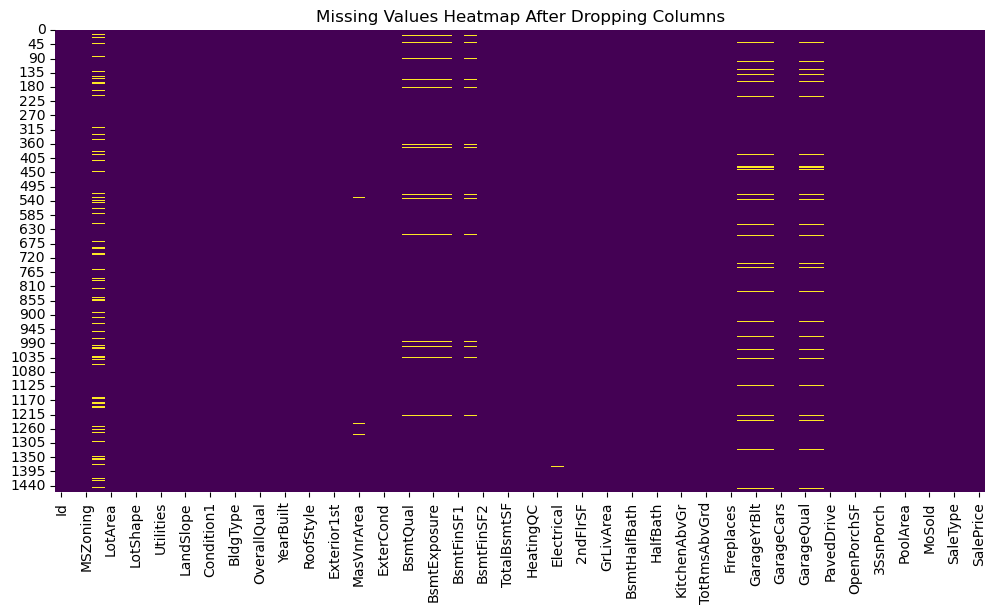

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Drop features with more than 500 null values
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Dropping Columns')
plt.show()

# Step 3: One-hot encoding for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.1].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Train a Random Forest model on the Train set
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = rf_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")

USING CATBOOST MODEL

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: []


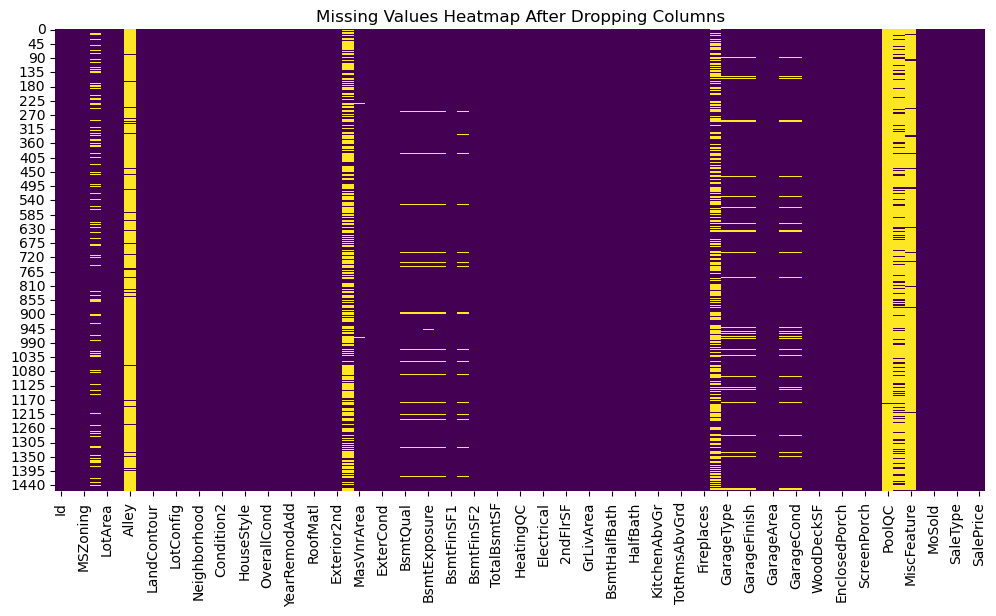

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Drop features with more than 500 null values
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Dropping Columns')
plt.show()

# Step 3: One-hot encoding for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Train a CatBoost model on the Train set
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = catboost_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")

FILLING NAN VALUES 

Numerical columns are filled with their mean values, and categorical columns are filled with their mode values before proceeding to one-hot encoding and other steps.


Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


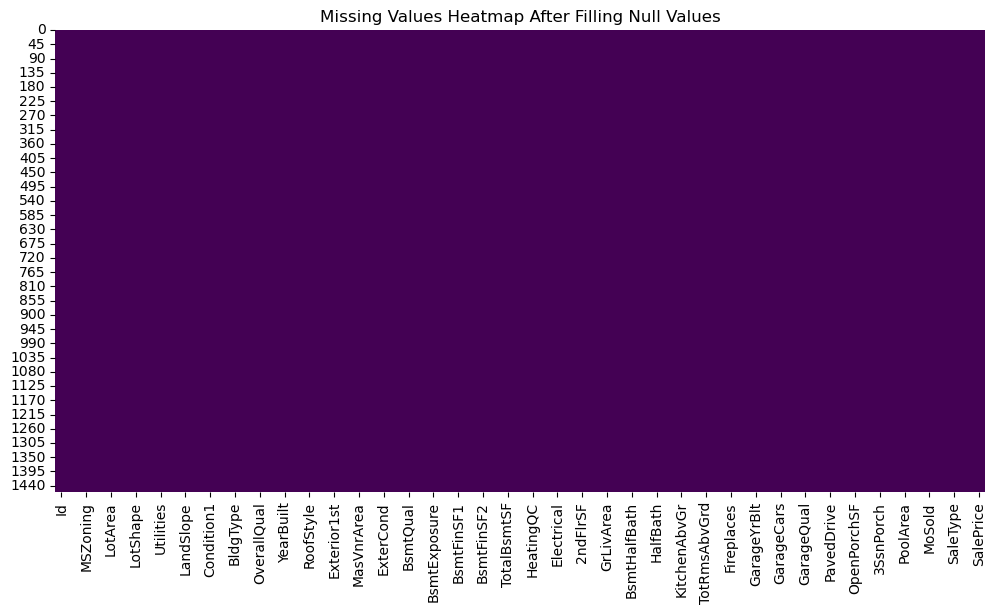

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Drop features with more than 500 null values
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Step 3: Fill remaining null values
# Fill numerical columns with mean
numerical_cols = train.select_dtypes(include=[np.number]).columns
train[numerical_cols] = train[numerical_cols].fillna(train[numerical_cols].mean())

# Fill categorical columns with mode
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Analyze the missing data after filling null values (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Filling Null Values')
plt.show()

# Step 4: One-hot encoding for each string-based feature
# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 5: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 6: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 7: Train a CatBoost model on the Train set
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Step 8: Predict on the Validation set
y_val_pred = catboost_model.predict(X_val)

# Step 9: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")


FILL WITH MEDIAN

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


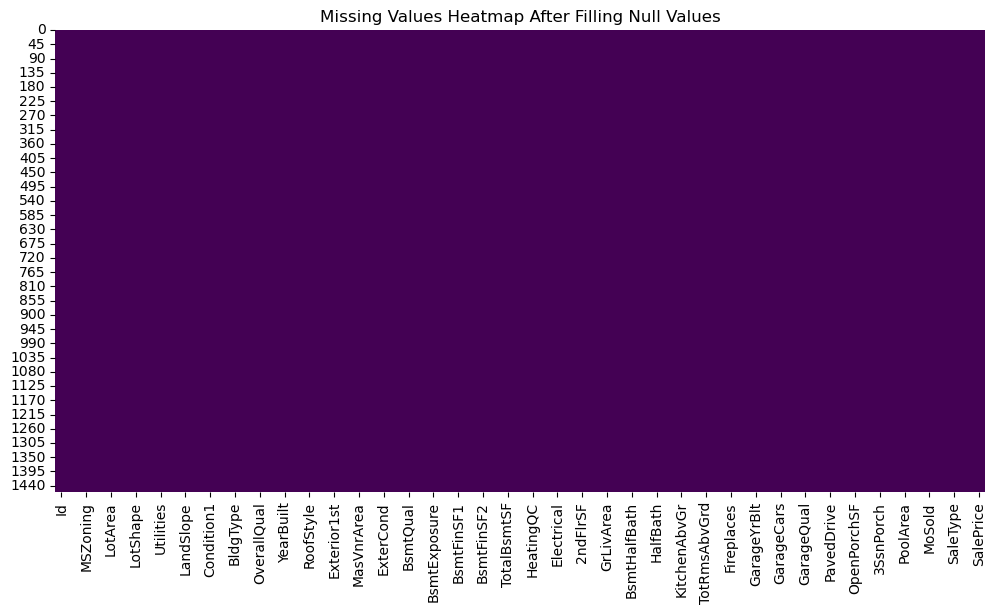

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Drop features with more than 500 null values
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Step 3: Fill remaining null values
# Fill numerical columns with median
numerical_cols = train.select_dtypes(include=[np.number]).columns
train[numerical_cols] = train[numerical_cols].fillna(train[numerical_cols].median())

# Fill categorical columns with mode
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Analyze the missing data after filling null values (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Filling Null Values')
plt.show()

# Step 4: One-hot encoding for each string-based feature
# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 5: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 6: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 7: Train a CatBoost model on the Train set
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Step 8: Predict on the Validation set
y_val_pred = catboost_model.predict(X_val)

# Step 9: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")


using XGBoost instead of CatBoost:

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


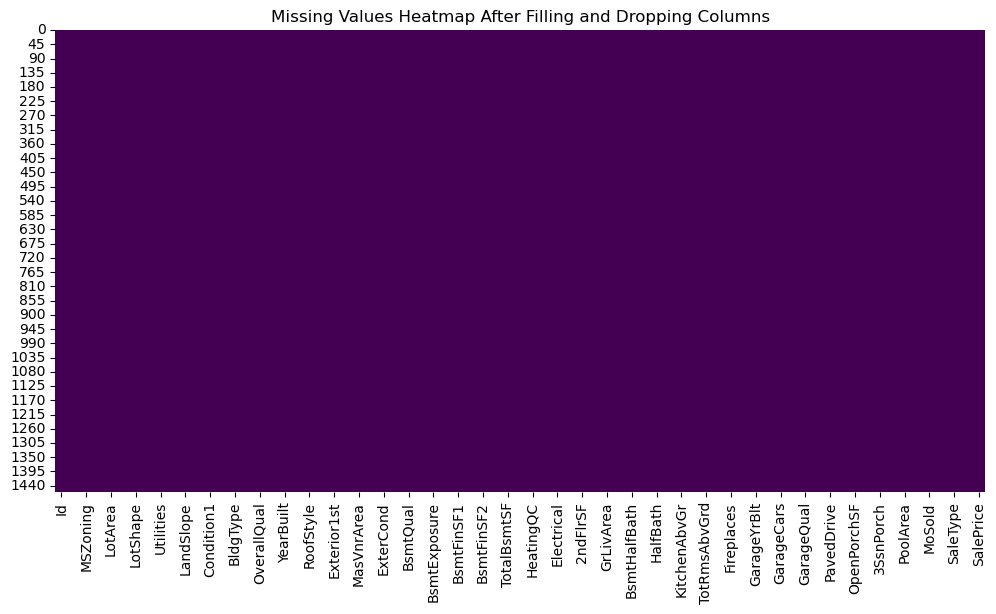

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Separate numeric and categorical columns
numeric_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the median
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols:
    mode_val = train[col].mode()[0]  # Get the most frequent value
    train[col].fillna(mode_val, inplace=True)

# Drop features with more than 500 null values (this should now be zero since missing values are filled)
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after filling and dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Filling and Dropping Columns')
plt.show()

# Step 3: One-hot encoding for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Train an XGBoost model on the Train set
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = xgb_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")

USING lightGBM INSTEAD

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


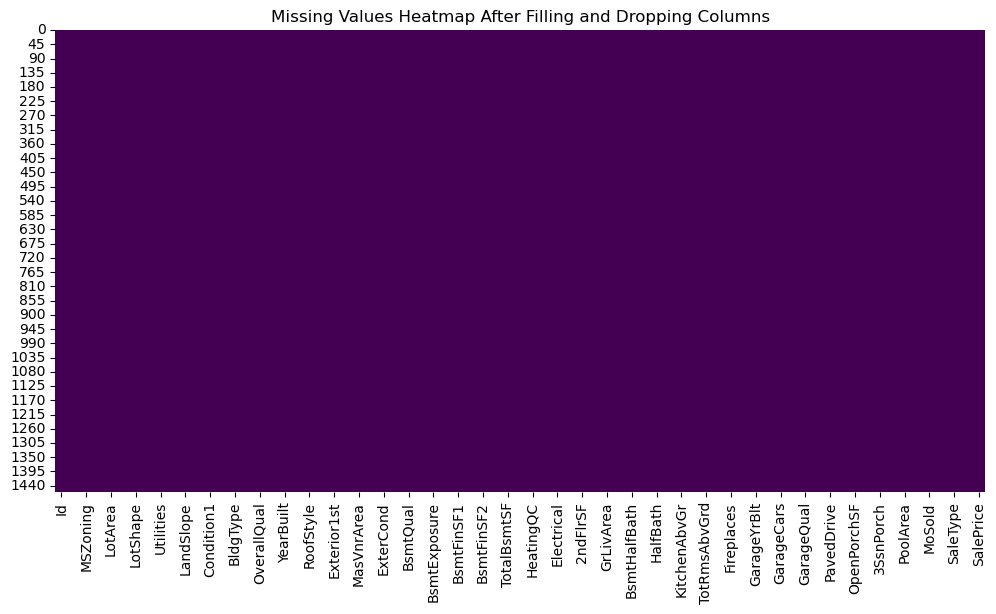

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

c:\Users\utkar\.conda\envs\py310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\utkar\.conda\envs\py310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 55
[LightGBM] [Info] Start training from score 181312.692759

Validation MSE (Logarithmic): 0.02552994262546
Validation RMSE (Logarithmic): 0.15978092071790048


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Separate numeric and categorical columns
numeric_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the median
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols:
    mode_val = train[col].mode()[0]  # Get the most frequent value
    train[col].fillna(mode_val, inplace=True)

# Drop features with more than 500 null values (this should now be zero since missing values are filled)
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after filling and dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Filling and Dropping Columns')
plt.show()

# Step 3: One-hot encoding for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Train a LightGBM model on the Train set
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31, random_state=42)
lgb_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = lgb_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")


Stacking XGBoost, LightGBM, and CatBoost models using StackingRegressor with Ridge regression as the final estimator:

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: []


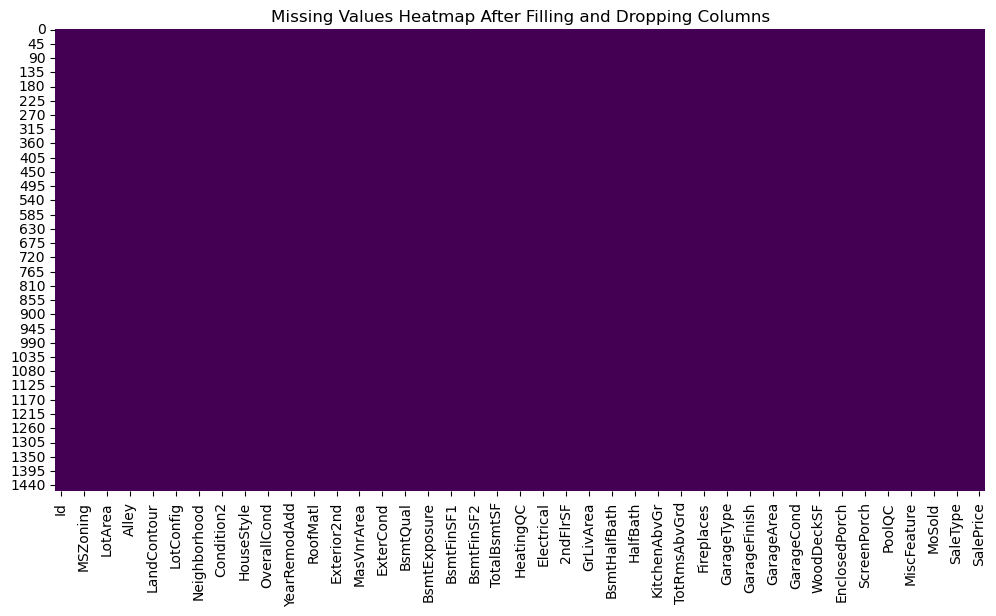

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Separate numeric and categorical columns
numeric_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the median
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols:
    mode_val = train[col].mode()[0]  # Get the most frequent value
    train[col].fillna(mode_val, inplace=True)

# Drop features with more than 500 null values (this should now be zero since missing values are filled)
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after filling and dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Filling and Dropping Columns')
plt.show()

# Step 3: One-hot encoding for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Define base models and stacking model
estimators = [
    ('xgb', XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=10, random_state=42)),
    ('lgbm', lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31, random_state=42)),
    ('catboost', CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, random_seed=42, verbose=0))
]

# Initialize the stacking model with Ridge as the final estimator
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = stacking_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")

Here's the complete code incorporating the use of MLPRegressor (Multi-layer Perceptron Regressor) to explore neural networks for regression:

Null Values in each column:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total Null Values:  7829

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


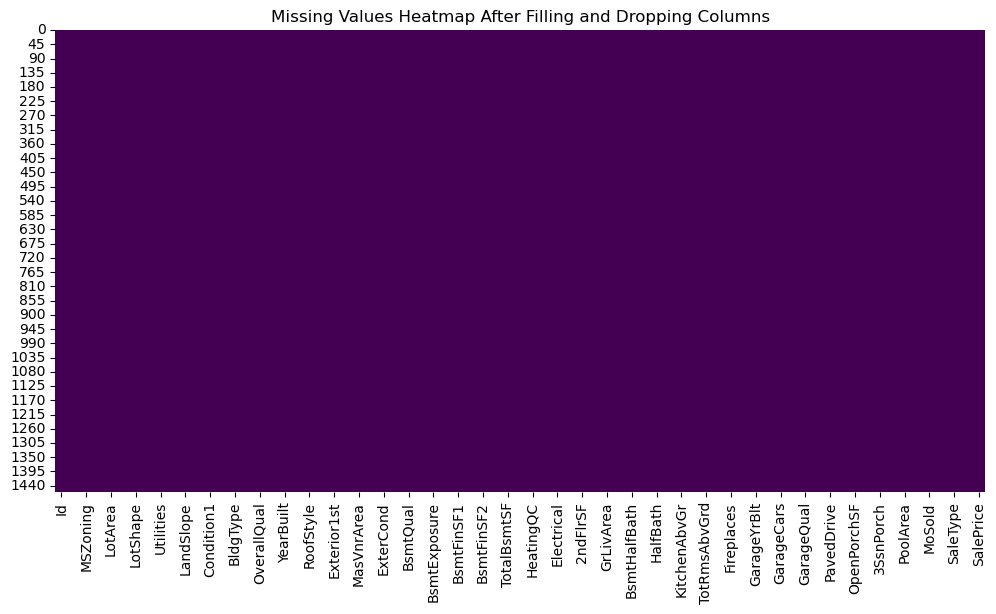

Data after one-hot encoding:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleT

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Step 1: Import the train.csv
train = pd.read_csv('train.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Separate numeric and categorical columns
numeric_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the median
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols:
    mode_val = train[col].mode()[0]  # Get the most frequent value
    train[col].fillna(mode_val, inplace=True)

# Drop features with more than 500 null values (this should now be zero since missing values are filled)
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after filling and dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Filling and Dropping Columns')
plt.show()

# Step 3: One-hot encoding for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical variables
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

print("Data after one-hot encoding:\n", train.head())

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Select features with correlation >= 0.2 with SalePrice
selected_features = corr_matrix.index[corr_matrix['SalePrice'].abs() >= 0.2].tolist()

# Remove SalePrice from the feature list since it's the target
selected_features.remove('SalePrice')

print(f"\nSelected features with correlation >= 0.2: {selected_features}")

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train[selected_features]
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Define and train the MLPRegressor model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = nn_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")

Null Values in each column:
 MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Total Null Values:  7878

Dropping features with more than 500 null values: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


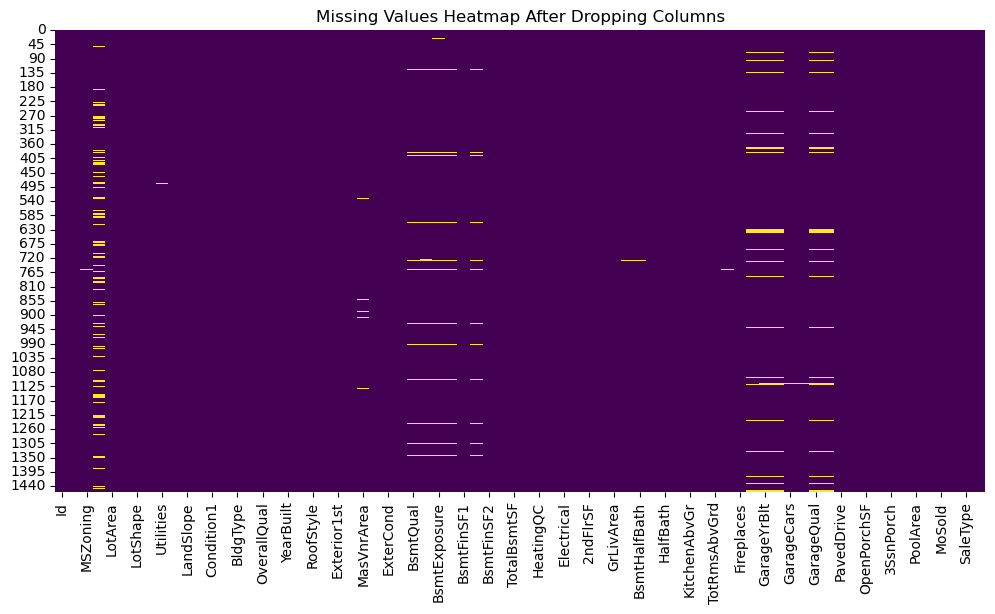

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0     1461          20         0         80.0    11622       0         0   
1     1462          20         1         81.0    14267       0         1   
2     1463          60         1         74.0    13830       0         1   
3     1464          60         1         78.0     9978       0         1   
4     1465         120         1         43.0     5005       0         1   
...    ...         ...       ...          ...      ...     ...       ...   
1454  2915         160         2         21.0     1936       0         0   
1455  2916         160         2         21.0     1894       0         0   
1456  2917          20         1        160.0    20000       0         0   
1457  2918          85         1         62.0    10441       0         0   
1458  2919          60         1         74.0     9627       0         0   

      LandContour  Utilities  LotConfig  ...  OpenPorchSF  EnclosedPorch  \
0          

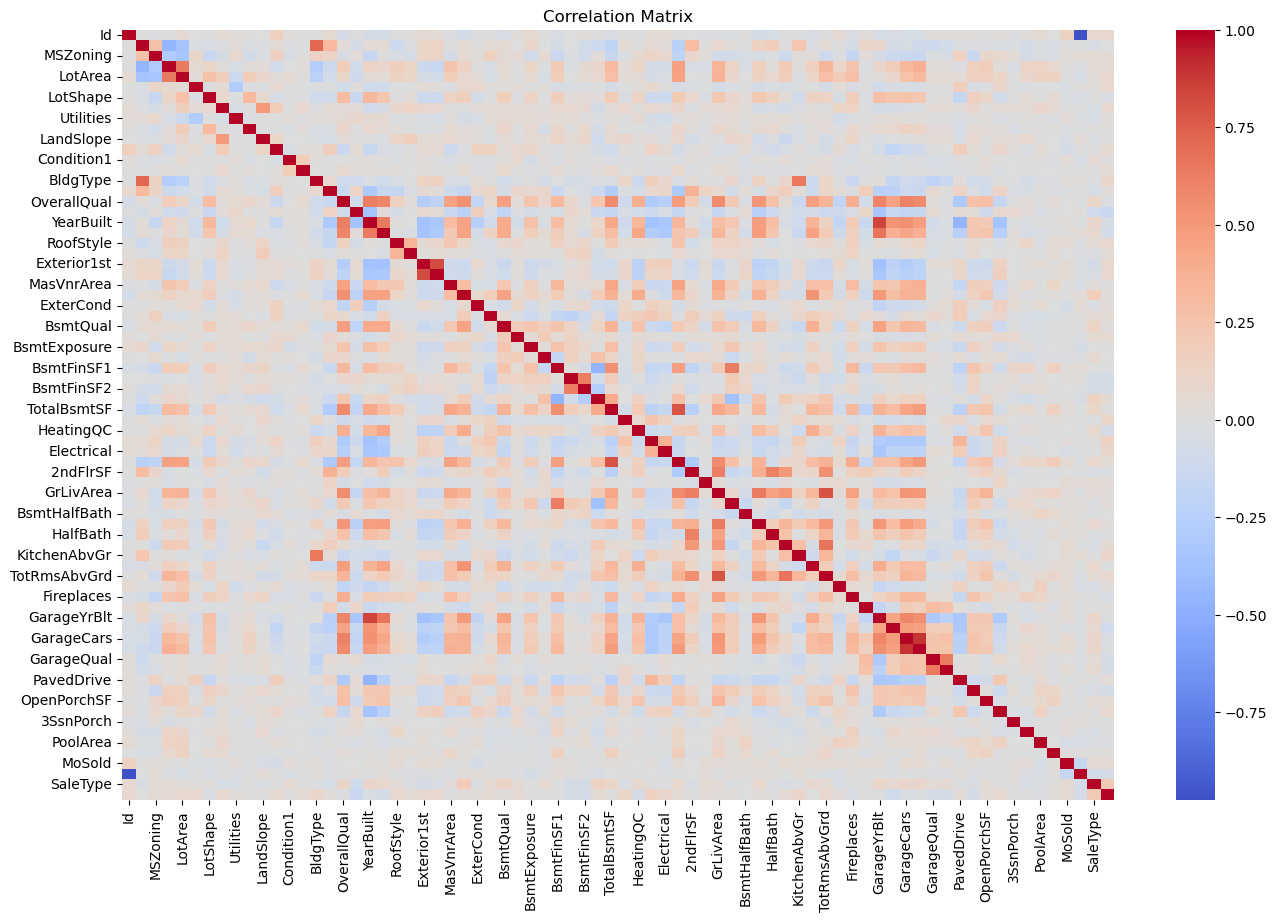

KeyError: 'SalePrice'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Import the train.csv
train = pd.read_csv('test.csv')

# Step 2: Check for Null Values and analyze it
null_values = train.isnull().sum()
print("Null Values in each column:\n", null_values[null_values > 0])
print("\nTotal Null Values: ", null_values.sum())

# Drop features with more than 500 null values
features_to_drop = null_values[null_values > 500].index
print(f"\nDropping features with more than 500 null values: {features_to_drop.tolist()}")
train.drop(columns=features_to_drop, inplace=True)

# Analyze the missing data after dropping features (optional visualization)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Dropping Columns')
plt.show()

# Step 3: Integer mapping for each string-based feature
# Identify categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns

# Integer mapping (using factorize for mapping)
for col in categorical_cols:
    train[col], _ = train[col].factorize()

print(train)

# Step 4: Checking correlation
# Correlation matrix
corr_matrix = train.corr()

# Visualizing the correlation matrix (optional)
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# If you want to see the top correlations with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nTop features correlated with SalePrice:\n", top_corr_features.head(30))

# Step 5: Split the data into Train (70%), Validation (15%), and Test (15%)
# Separate target variable 'SalePrice' from the features
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Step 6: Train a Random Forest model on the Train set
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict on the Validation set
y_val_pred = rf_model.predict(X_val)

# Step 8: Calculate MSE and RMSE for the Validation set
# Calculate the logarithm of the predictions and the actual values
y_val_log_pred = np.log1p(y_val_pred)
y_val_log_actual = np.log1p(y_val)

# Calculate the Logarithmic MSE and RMSE
mse_log = mean_squared_error(y_val_log_actual, y_val_log_pred)
rmse_log = np.sqrt(mse_log)

print(f"\nValidation MSE (Logarithmic): {mse_log}")
print(f"Validation RMSE (Logarithmic): {rmse_log}")